### Segment Geospatial (samgeo)

[https://samgeo.gishub.org](https://samgeo.gishub.org)

[https://samgeo.gishub.org/samgeo/](https://samgeo.gishub.org/samgeo/)

[https://samgeo.gishub.org/examples/text_prompts/](https://samgeo.gishub.org/examples/text_prompts/)

[- página parâmetros](https://samgeo.gishub.org/samgeo/)

In [1]:
# conda install pytorch torchvision -c pytorch
# pip install segment-geospatial groundingdino-py leafmap localtileserver
# conda install gdal

In [2]:
from samgeo.text_sam import LangSAM

In [3]:
# carregar imagem

caminho_imagem = 'imgs_teste/fotos_geotag/'
arquivo_entrada = 'DJI_0425_georeferenced.png'
arquivo_saida = caminho_imagem+arquivo_entrada+'mascara'+'.tif'

image = caminho_imagem + arquivo_entrada

In [4]:
# vit_l, vit_b, vit_h
sam = LangSAM(model_type='vit_h')

final text_encoder_type: bert-base-uncased


**box_threshold:** Este valor é usado para detecção de objetos na imagem. Um valor mais alto torna o modelo mais seletivo, identificando apenas as instâncias de objetos com maior confiança, resultando em menos detecções no geral. Um valor mais baixo, por outro lado, torna o modelo mais tolerante, levando a um aumento nas detecções, incluindo possivelmente aquelas com menor confiança.

**text_threshold:** Este valor é usado para associar os objetos detectados com o texto fornecido. Um valor mais alto exige uma associação mais forte entre o objeto e o texto, levando a associações mais precisas, mas potencialmente menos. Um valor mais baixo permite associações mais frouxas, o que pode aumentar o número de associações, mas também introduzir correspondências menos precisas.

In [10]:
# parametros

text_prompt = "people"

box_t = 0.1

text_t = 0.1

In [11]:
# criar mascara

mascaras = sam.predict(image=image,
                       text_prompt=text_prompt,
                       box_threshold=box_t,
                       text_threshold=text_t,
                       output=arquivo_saida)

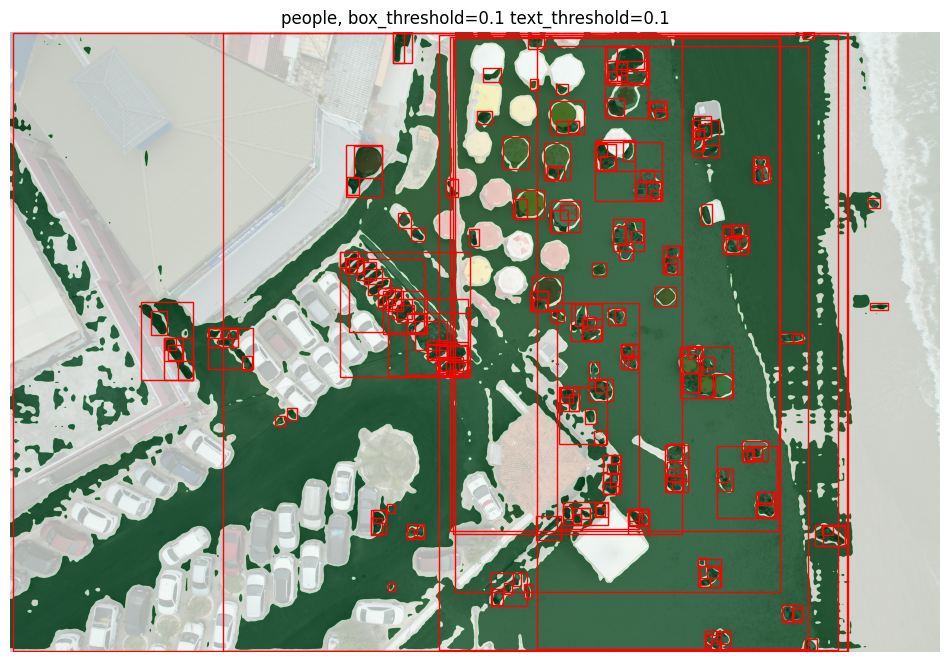

In [12]:
# mostrar imagem

sam.show_anns(
    cmap='Greens',
    box_color='red',
    title=f'{text_prompt}, box_threshold={box_t} text_threshold={text_t}',
    alpha=0.7
)

In [13]:
# exportar a máscara para um shapefile

shapefile_saida = caminho_imagem+arquivo_entrada+'mascara'+'.shp'

sam.raster_to_vector(arquivo_saida, shapefile_saida)